In [1]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import handwritten digits data in table

data = load_digits()
labels = pd.Series(data['target'])
digits = pd.DataFrame(data['data'])
print(labels.head(2))
digits.head(2)

0    0
1    1
dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0


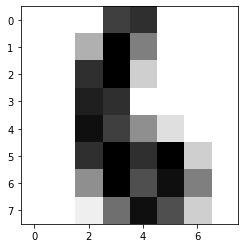

In [2]:
# convert row in 8x8 array to visualize the numbers

first_image = digits.iloc[6]
np_first_image = first_image.values
np_first_image = np_first_image.reshape(8,8)

plt.imshow(np_first_image, cmap = 'gray_r')

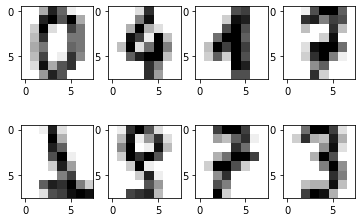

In [3]:
f, fig = plt.subplots(2,4)

fig[0,0].imshow(digits.iloc[0].values.reshape(8,8), cmap = 'gray_r')
fig[0,1].imshow(digits.iloc[100].values.reshape(8,8), cmap = 'gray_r')
fig[0,2].imshow(digits.iloc[200].values.reshape(8,8), cmap = 'gray_r')
fig[0,3].imshow(digits.iloc[300].values.reshape(8,8), cmap = 'gray_r')

fig[1,0].imshow(digits.iloc[1000].values.reshape(8,8), cmap = 'gray_r')
fig[1,1].imshow(digits.iloc[1100].values.reshape(8,8), cmap = 'gray_r')
fig[1,2].imshow(digits.iloc[1200].values.reshape(8,8), cmap = 'gray_r')
fig[1,3].imshow(digits.iloc[1300].values.reshape(8,8), cmap = 'gray_r')

In [4]:
from sklearn.model_selection import train_test_split

# split the data in train and test datasets
# 50% split

x_train, x_test, y_train, y_test = train_test_split(digits, labels, test_size = .5, random_state = 1)

print(x_train.shape[0], x_test.shape[0])



898 899


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

# create functions for training and testing knn model

def train(k, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(train_features, train_labels)
    return knn

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    test_df = pd.DataFrame()
    test_df['labels'] = test_labels
    test_df['predictions'] = predictions
    accuracy = (sum(test_df['labels'] == test_df['predictions']) / len(test_df))
    return accuracy
    
def cross_validate(k, splits = 4):
    fold_accuracies = []
    kf = KFold(n_splits = splits, random_state = 1)
    
    for train_index, test_index in kf.split(digits):
        train_features, test_features = digits.loc[train_index], digits.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train(k, train_features, train_labels)
        accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(accuracy)
    return fold_accuracies


np.mean(cross_validate(1))


0.9677233358079684

In [18]:
# train/test for various values of neighbors

kneighbors_test = list(range(1,11))
accuracy_tests = []

for i in kneighbors_test:
    accuracies = cross_validate(i)
    accuracy = np.mean(accuracies)
    accuracy_tests.append(accuracy)
    
accuracy_test_df = pd.DataFrame()

accuracy_test_df['range'] = kneighbors_test
accuracy_test_df['accuracy'] = accuracy_tests


print(accuracy_test_df.sort_values(by = 'accuracy',ascending = False))

   range  accuracy
0      1  0.967723
3      4  0.964948
2      3  0.962718
4      5  0.962167
1      2  0.961601
5      6  0.958827
6      7  0.957159
7      8  0.957158
8      9  0.954380
9     10  0.952710


The K-Nearest Neighbors algorithm is able to predict with accuracy of about 96%.

In [13]:
from sklearn.neural_network import MLPClassifier

# use neural network with one hidden layer to predict numbers

def train_nn(neuron_size, train_features, train_labels):
    nn = MLPClassifier(hidden_layer_sizes = neuron_size)
    nn.fit(train_features, train_labels)
    return nn

# utilize test(model, test_features, test_labels) func from previous step which will work here too

def cross_val_nn(neurons, splits = 4):
    fold_accuracies = []
    kf = KFold(n_splits = splits, random_state = 2)
    
    for train_index, test_index in kf.split(digits):
        train_features, test_features = digits.loc[train_index], digits.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_nn(neurons, train_features, train_labels) # train_nn() func
        accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(accuracy)
    return fold_accuracies



/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

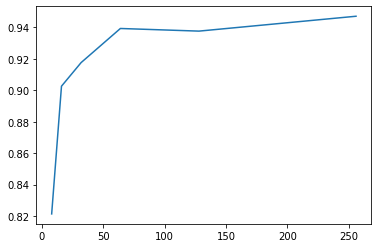

In [14]:
# check accuracies for single hidden layer, different numbers of neurons

neurons_list = [(8,), (16,), (32,), (64,), (128,), (256,)]
nn_accuracies = []

for i in neurons_list:
    accuracies = cross_val_nn(i)
    acc_mean = np.mean(accuracies)
    nn_accuracies.append(acc_mean)
    

n_neur = [8,16,32,64,128,256]    
plt.plot(n_neur, nn_accuracies)

In [15]:
print(nn_accuracies)

[0.821347438752784, 0.9026156891858451, 0.9176416728532542, 0.9393417470923039, 0.9376639445681761, 0.9471269487750557]


With the varying number of neurons with one hidden layer, the accuracy increased with the higher number of neruons for the most part. However the max accuracy was 95.5% which is less than the 96% accuracy from the K-Nearest Neighbors algorithm, so we wouldn't want to use one hidden layer instead since it adds no value.

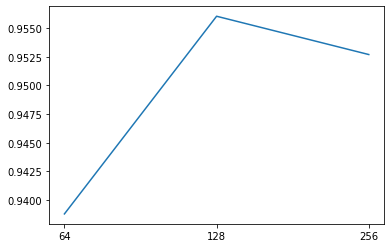

In [16]:
# try adding in additional layers

neurons_list2 = [(64,64), (128,128), (256,256)]
nn_accuracies2 = []

for i in neurons_list2:
    accuracies = cross_val_nn(i)
    acc_mean = np.mean(accuracies)
    nn_accuracies2.append(acc_mean)
    
n_neur2 = ['64', '128', '256']    
plt.plot(n_neur2, nn_accuracies2)

The performance of 2 hidden layer network follows a similar trend to the 1 layer, and the accuracy is only slightly better (<96%) which means that KNN is still more effective at this stage.

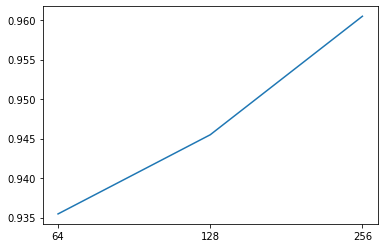

In [17]:
# test our 3 hidden layers - tends to overfit so going to increase the number of k-folds to 6 instead of 4

neurons_list3 = [(64,64,64), (128,128,128), (256,256,256)]
nn_accuracies3 = []

for i in neurons_list3:
    accuracies = cross_val_nn(neurons = i, splits = 6) # adjusting splits to 6
    acc_mean = np.mean(accuracies)
    nn_accuracies3.append(acc_mean)
    
    
n_neur3 = ['64', '128', '256']
plt.plot(n_neur3, nn_accuracies3)
    

By using 3 hidden layers and 6 fold cross validation, we're able to increase the accuracy up to 96% which is in line with the KNN algorithm. We generally see from this that increasing the number of hidden layers and neurons increases accuracy. 